# Shinkansen Travel Data Statistics Project

## Data Processing

In [1]:
options(warn=-1)

In [2]:
install.packages("MASS")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(glmnet)
library(MASS)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loaded glmnet 4.1-8


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [4]:
travel <- read.csv("TravelTrain.csv", header=T, sep=",")
survey <- read.csv("SurveyTrain.csv", header=T, sep=",")
full <- merge(survey,travel,by.x="ID",by.y="ID")
nonfactors = c("ID", "Age", "Travel_Distance", "DepartureDelay_in_Mins", "ArrivalDelay_in_Mins")
factors = -which(names(full) %in% nonfactors)
full[, factors] = lapply(full[, factors], as.factor)
head(full)

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,⋯,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,⋯,need improvement,poor,Female,Loyal Customer,52,,Business,272,0,5
2,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,⋯,good,good,Male,Loyal Customer,48,Personal Travel,Eco,2200,9,0
3,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,⋯,excellent,excellent,Female,Loyal Customer,43,Business travel,Business,1061,77,119
4,98800004,0,acceptable,Ordinary,need improvement,,need improvement,acceptable,need improvement,acceptable,⋯,acceptable,acceptable,Female,Loyal Customer,44,Business travel,Business,780,13,18
5,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,⋯,good,good,Female,Loyal Customer,50,Business travel,Business,1981,0,0
6,98800006,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,⋯,acceptable,acceptable,Male,Loyal Customer,44,Business travel,Business,2810,0,0


In [5]:
num_rows_with_na <- sum(apply(full, 1, function(row) any(is.na(row))))
num_rows_with_na

[1] 390

In [6]:
full_complete <- na.omit(full)
head(full_complete)

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,⋯,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,⋯,need improvement,poor,Female,Loyal Customer,52,,Business,272,0,5
2,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,⋯,good,good,Male,Loyal Customer,48,Personal Travel,Eco,2200,9,0
3,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,⋯,excellent,excellent,Female,Loyal Customer,43,Business travel,Business,1061,77,119
4,98800004,0,acceptable,Ordinary,need improvement,,need improvement,acceptable,need improvement,acceptable,⋯,acceptable,acceptable,Female,Loyal Customer,44,Business travel,Business,780,13,18
5,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,⋯,good,good,Female,Loyal Customer,50,Business travel,Business,1981,0,0
6,98800006,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,⋯,acceptable,acceptable,Male,Loyal Customer,44,Business travel,Business,2810,0,0


In [7]:
num_rows_with_na <- sum(apply(full_complete, 1, function(row) any(is.na(row))))
num_rows_with_na

[1] 0

In [8]:
full_complete <- full_complete[ , !(names(full_complete) %in% c("ID"))]
head(full_complete)

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,⋯,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,⋯,need improvement,poor,Female,Loyal Customer,52,,Business,272,0,5
2,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,⋯,good,good,Male,Loyal Customer,48,Personal Travel,Eco,2200,9,0
3,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,⋯,excellent,excellent,Female,Loyal Customer,43,Business travel,Business,1061,77,119
4,0,acceptable,Ordinary,need improvement,,need improvement,acceptable,need improvement,acceptable,acceptable,⋯,acceptable,acceptable,Female,Loyal Customer,44,Business travel,Business,780,13,18
5,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,⋯,good,good,Female,Loyal Customer,50,Business travel,Business,1981,0,0
6,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,acceptable,⋯,acceptable,acceptable,Male,Loyal Customer,44,Business travel,Business,2810,0,0


## EDA/Visualizations to check for balanced data

### Bar graph to see distribution of response variable (overall experience)

In [9]:
empty_vals <- sapply(full_complete, function(x) x == "")
colSums(empty_vals)

rows_to_keep <- apply(empty_vals, 1, function(row) !any(row))
                      
shinkansen_data <- full_complete[rows_to_keep, ]
                      
colSums(sapply(shinkansen_data, function(x) x == ""))

Overall_Experience            Seat_comfort              Seat_Class 
                      0                      61                       0 
Arrival_time_convenient                Catering       Platform_location 
                   8891                    8702                      30 
    Onboardwifi_service   Onboard_entertainment          Online_support 
                     30                      18                      91 
     Onlinebooking_Ease         Onboard_service                Leg_room 
                     73                    7569                      90 
       Baggage_handling         Checkin_service             Cleanliness 
                    142                      77                       6 
        Online_boarding                  Gender            CustomerType 
                      6                      47                    8888 
                    Age              TypeTravel            Travel_Class 
                      0                    9161                       0 
        Travel_Distance  DepartureDelay_in_Mins    ArrivalDelay_in_Mins 
                      0                       0                       0

Overall_Experience            Seat_comfort              Seat_Class 
                      0                       0                       0 
Arrival_time_convenient                Catering       Platform_location 
                      0                       0                       0 
    Onboardwifi_service   Onboard_entertainment          Online_support 
                      0                       0                       0 
     Onlinebooking_Ease         Onboard_service                Leg_room 
                      0                       0                       0 
       Baggage_handling         Checkin_service             Cleanliness 
                      0                       0                       0 
        Online_boarding                  Gender            CustomerType 
                      0                       0                       0 
                    Age              TypeTravel            Travel_Class 
                      0                       0                       0 
        Travel_Distance  DepartureDelay_in_Mins    ArrivalDelay_in_Mins 
                      0                       0                       0


        0         1 
0.4531106 0.5468894 

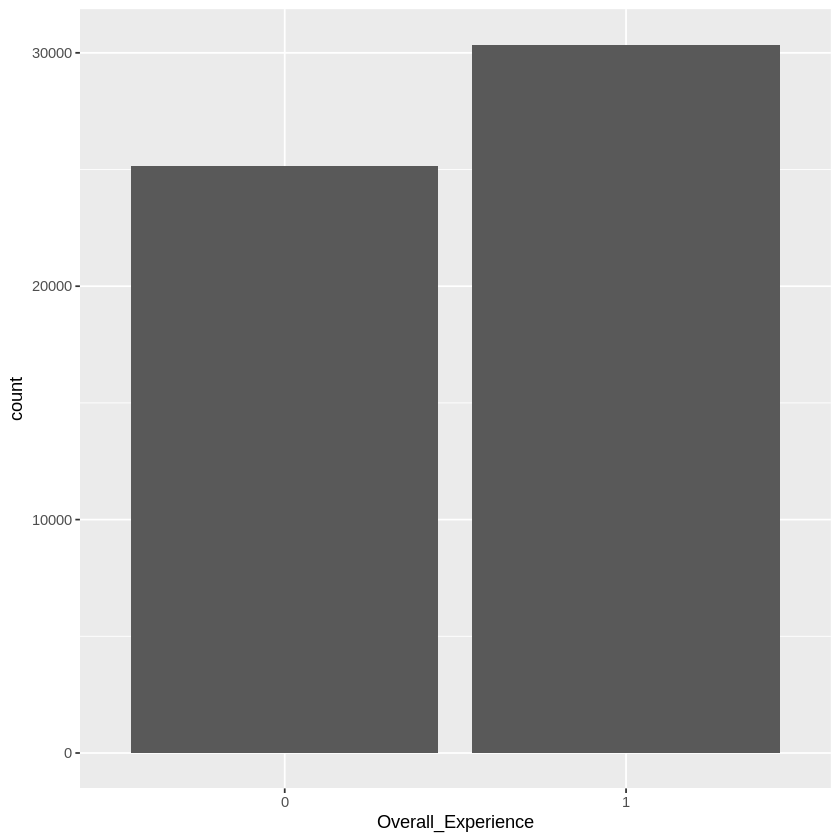

In [10]:
experience <- ggplot(shinkansen_data, aes(x = Overall_Experience)) +
  geom_bar()
experience

proportions <- prop.table(table(shinkansen_data$Overall_Experience))
proportions

There is a relatively even distribution of overall experiences, with proportions of about 45% and 55%, so the dataset is balanced, and there is no need to undersample/oversample any data

### Bar plots to see distributions of numerical variables

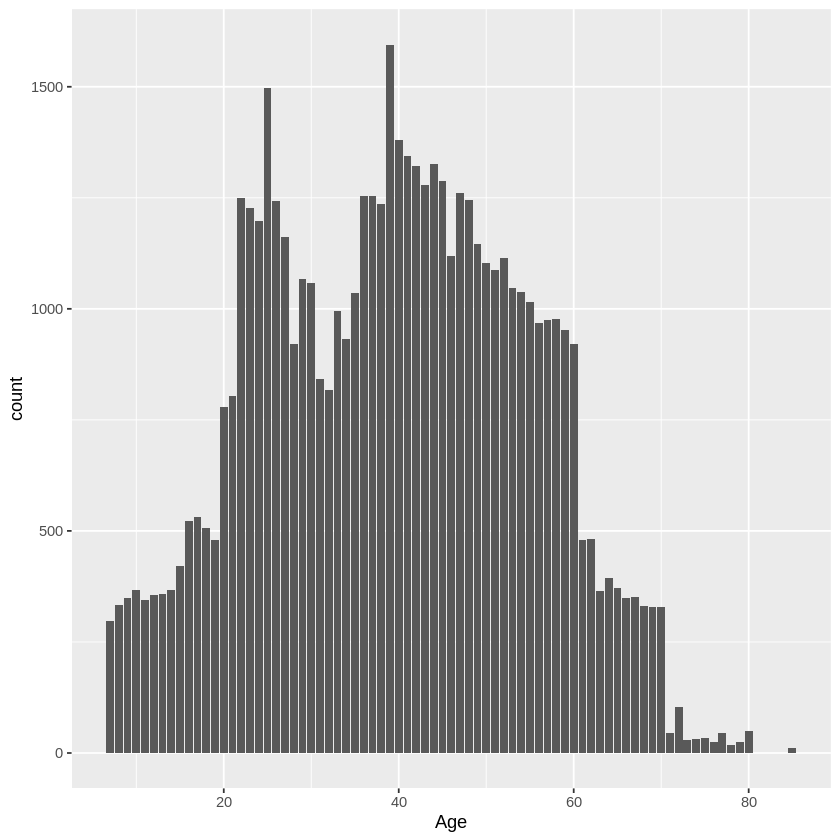

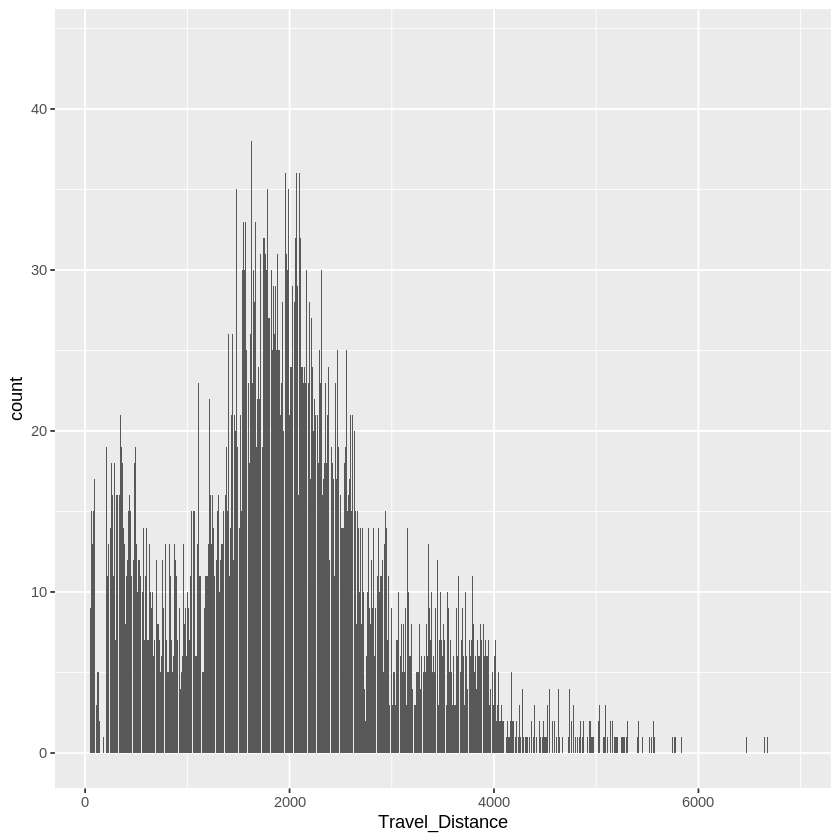

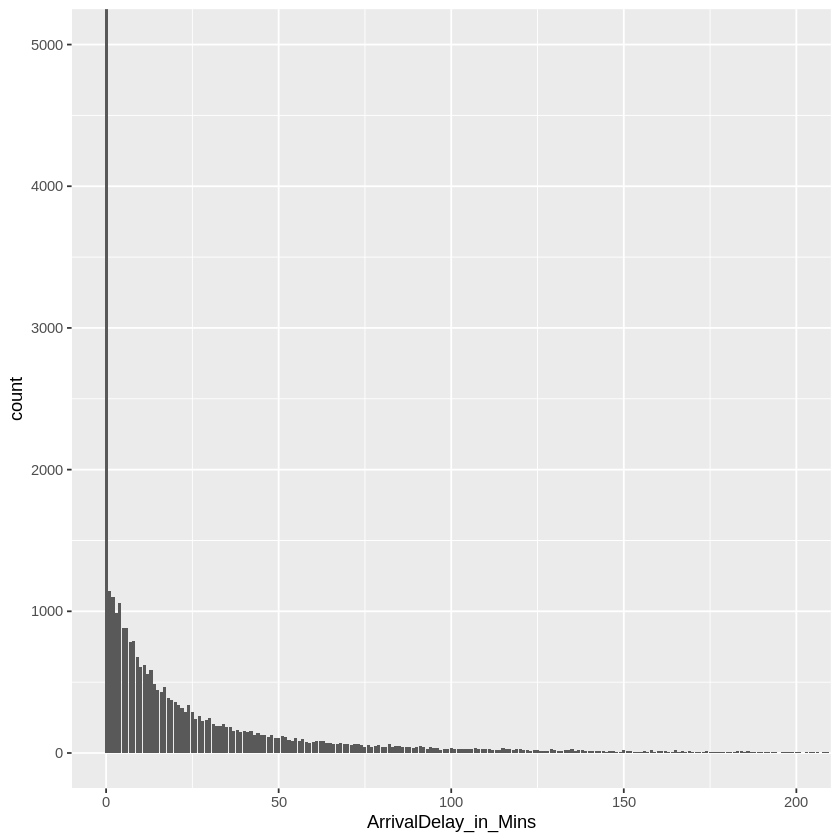

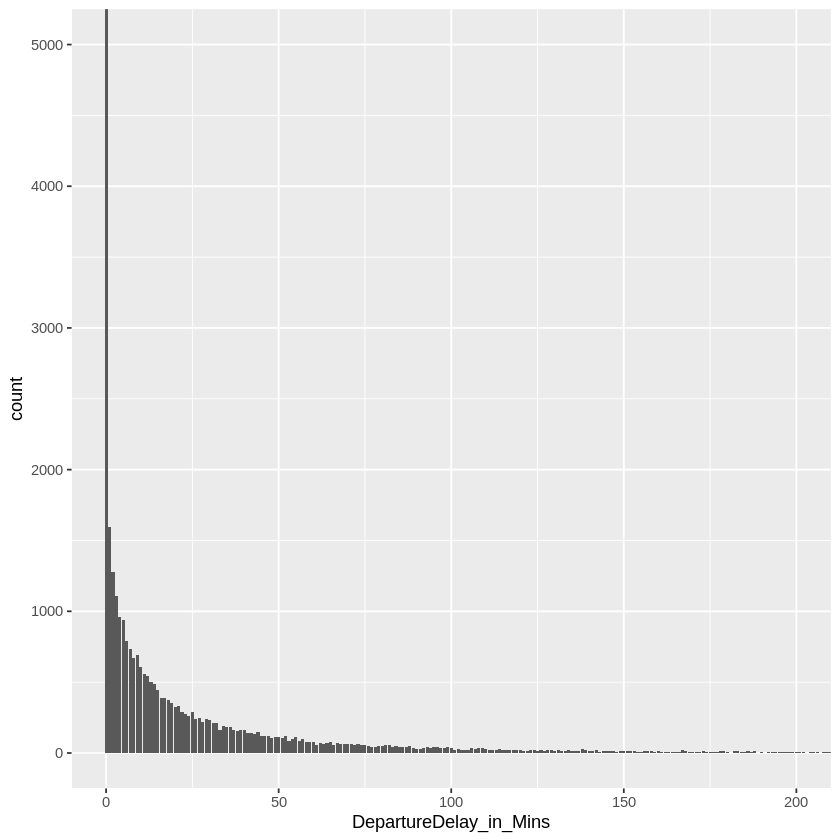

In [11]:
plot1 <- ggplot(shinkansen_data, aes(x = Age)) + geom_bar() 
plot2 <- ggplot(shinkansen_data, aes(x = Travel_Distance)) + geom_bar()
plot3 <- ggplot(shinkansen_data, aes(x = ArrivalDelay_in_Mins)) + 
  geom_bar() + 
  coord_cartesian(xlim = c(0, 200), ylim = c(0, 5000))
plot4 <- ggplot(shinkansen_data, aes(x = DepartureDelay_in_Mins)) + 
  geom_bar() + 
  coord_cartesian(xlim = c(0, 200), ylim = c(0, 5000))

plot1
plot2
plot3
plot4

The age and travel distance values follow a roughly normal distribution, with the majority of ages being between 25-60 and the majority of distances being between 1000 and 3000.

The distributions of arrival delay and deparature delay look quite similar, we can plot them against each other to check for a linear relationship 

### Scatterplot of arrival delay vs departure delay

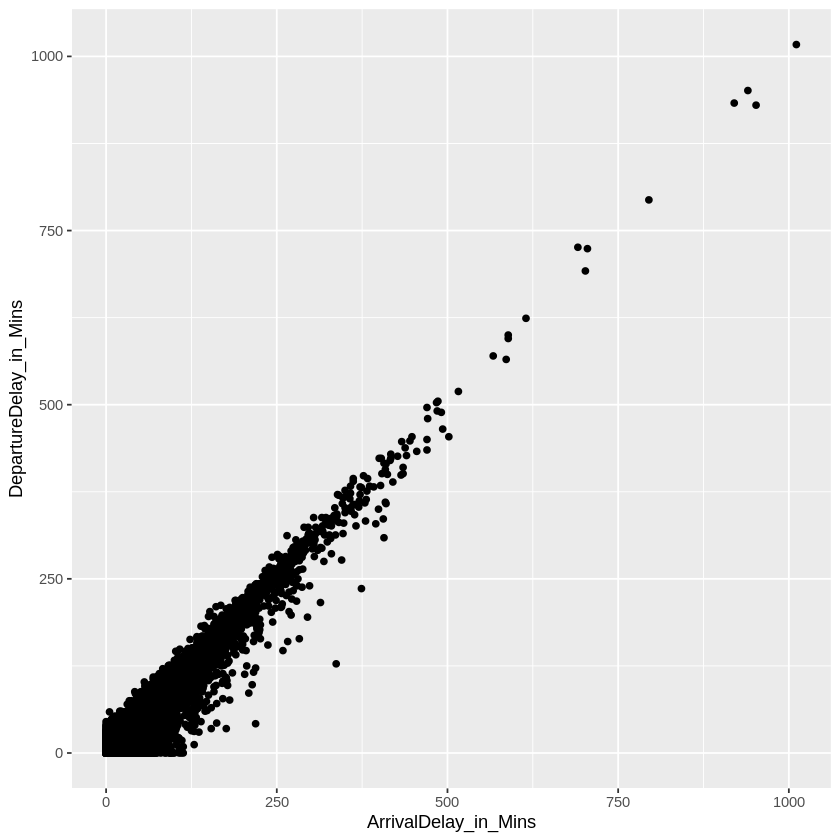

In [12]:
delays <- ggplot(shinkansen_data, aes(x = ArrivalDelay_in_Mins, y = DepartureDelay_in_Mins)) +
  geom_point()
delays

These look quite positively correlated, so it is likely we will remove one of the variables during feature selection

### Checking the distribution of the types of customers, to see if data is skewed or not

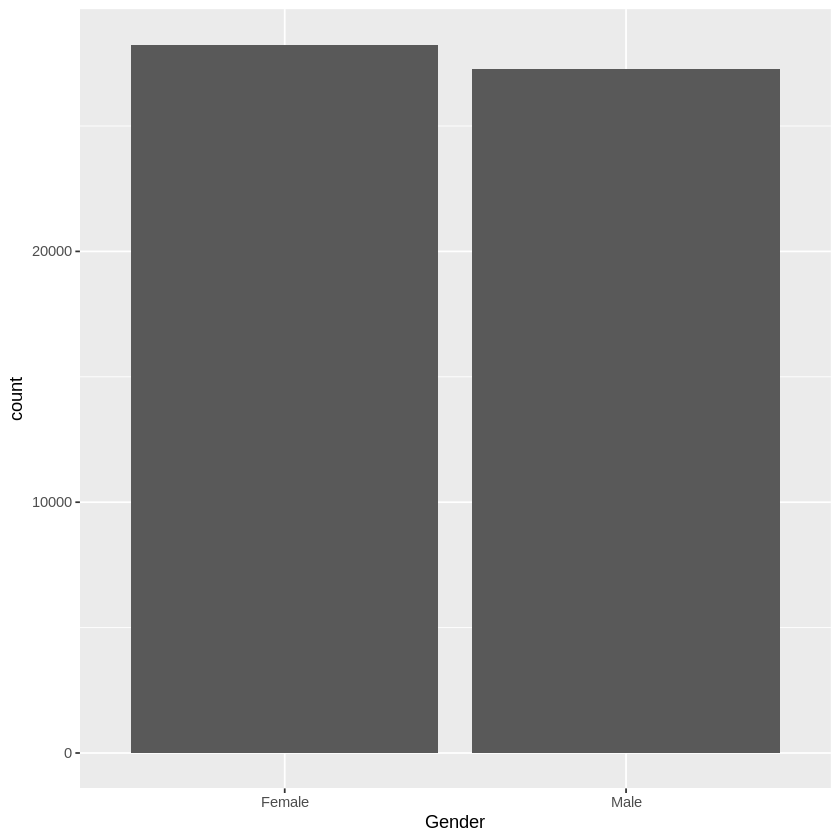

In [13]:
# Checking counts of gender
gender <- ggplot(shinkansen_data, aes(x = Gender)) +
  geom_bar()
gender

The distribution of Female vs Males seems roughly equal.

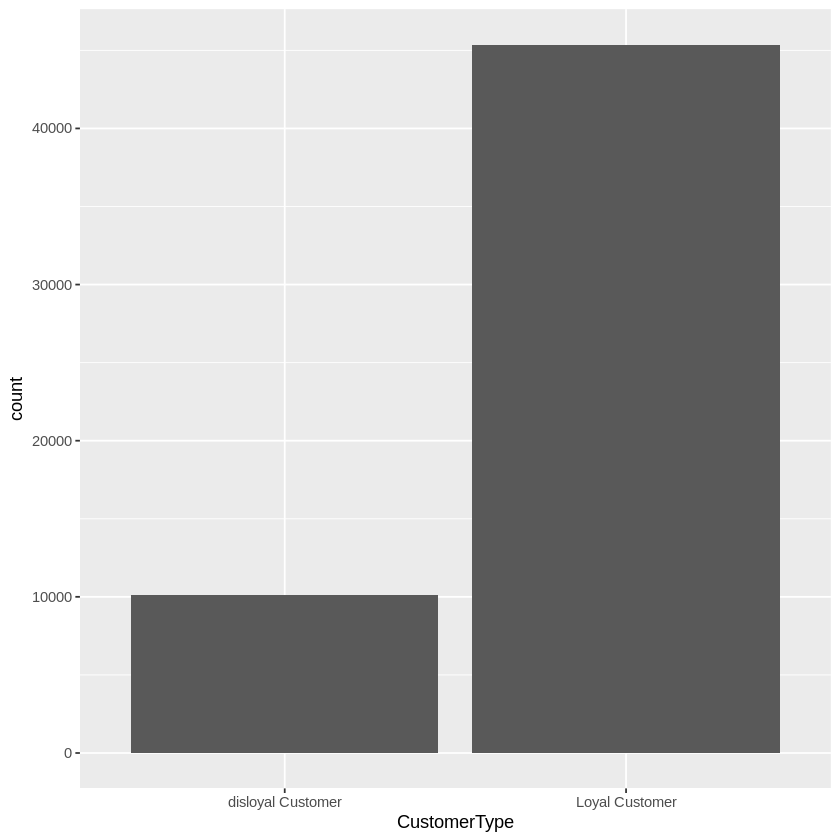

In [14]:
# checking counts of customer type
customer_type <- ggplot(shinkansen_data, aes(x = CustomerType)) +
  geom_bar()
customer_type

There seems to be an imbalance in the type of customer. Having more loyal customers may skew data, in terms of the frequency of these customers giving their surveys, as well as their overall opinion of the system.

We can do a quick check to see if this imbalance is shown in the overall experience (response variable).

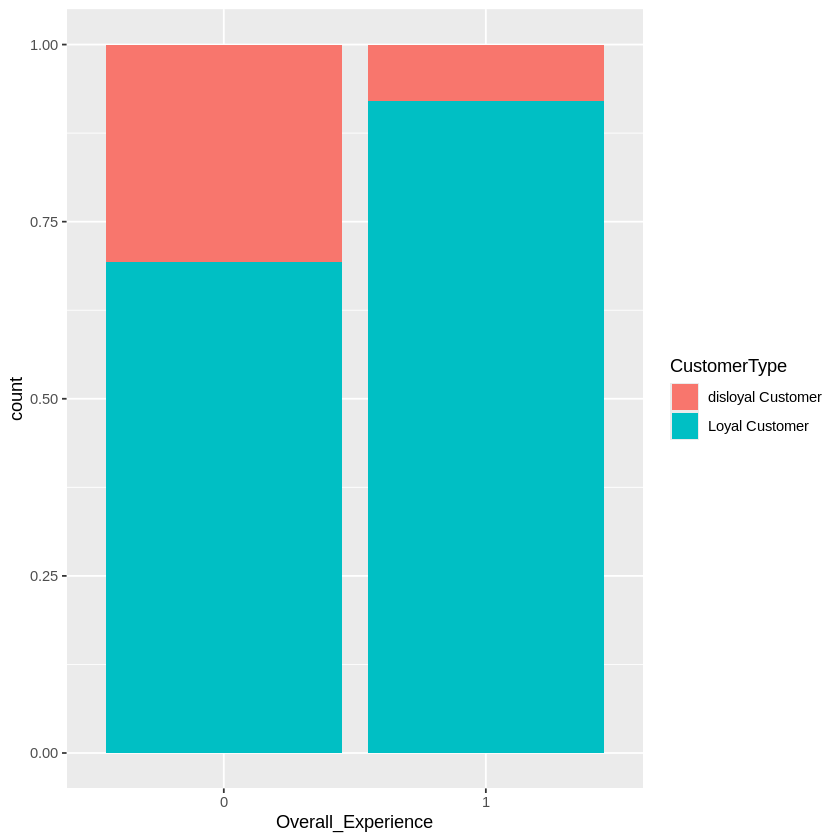

In [15]:
# plotting proportions of loyal and disloyal customers in the responses
ggplot(shinkansen_data, aes(x = Overall_Experience,fill = CustomerType)) + 
    geom_bar(position = "fill")

It does appear that more loyal customers have a better experience overall, but this isn't an enormous difference, so it appears the imbalance of customer type won't be skewing the results too badly.

## Feature Selection

Our model involves 25 variables (including categorical and continous variables). Of which, the categorical variables involve 5-7 different levels of categories. Our overall data, after processing, involves over 90000 rows. This makes our model significantly complex. 

Therefore, we'll first conduct feature selection to reduce model complexity.

But, what should our approach look like?

#### Understanding Cramer's V

Cramer's V is a statistic that will be used to measure the association between two categorical variables, offering a value from 0 to 1. It is calculated from the chi-squared statistic from a contingency table, which assesses the independence of two variables. The formula for Cramer's V is:

$$ V = \sqrt{\frac{\chi^2/n}{\min(k-1, r-1)}} $$

where $\chi^2$ is the chi-squared statistic, $n$ is the total number of observations, $k$ is the number of columns, and $r$ is the number of rows in the table. A Cramer's V near 0 signifies a weak association, and one close to 1 indicates a strong associtomer satisfaction.


#### Cramer's V in the Context of Our Project

In our study, we will apply Cramer's V to evaluate the relationship between various categorical predictors and our response variable, `Overall_Experience`. This measure will guide us in understanding the extent to which different factors affect the overall customer experience.

Additionally, we will use Cramer's V for detecting multicollinearity among categorical predictors. Multicollinearity, where predictors are highly inter-correlated, can compromise the integrity of statistical inferences.

#### Significance of Cramer's V in feature selection process

High values of Cramer's V between pairs of variables will highlight redundancies and strategic associations, influencing our decision to remove features that exhibit multicollinearity, and choose variables that best explain `Overall_Experience` of commuters.

In [16]:
set.seed(123) # For reproducibility
sample_frac <- 0.1
full_sampled <- full_complete[sample(nrow(full_complete), size = floor(nrow(full_complete) * sample_frac)), ]

In [17]:
head(full_sampled)

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,⋯,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
51883,0,need improvement,Green Car,need improvement,need improvement,manageable,excellent,need improvement,good,excellent,⋯,good,excellent,Female,disloyal Customer,36,Business travel,Business,2200,37,40
58120,0,good,Ordinary,acceptable,acceptable,manageable,good,acceptable,good,good,⋯,good,good,Male,Loyal Customer,30,Business travel,Eco,2410,18,8
3006,1,good,Green Car,good,good,need improvement,need improvement,good,need improvement,need improvement,⋯,good,need improvement,Male,disloyal Customer,39,Business travel,Business,2696,0,0
30044,1,poor,Green Car,poor,,Inconvinient,excellent,excellent,excellent,excellent,⋯,excellent,excellent,Male,Loyal Customer,29,Business travel,Business,2781,6,0
68584,0,good,Ordinary,poor,good,Convinient,poor,good,poor,poor,⋯,good,poor,Male,Loyal Customer,29,,Eco,2143,0,0
62823,1,excellent,Green Car,excellent,excellent,very convinient,good,good,good,good,⋯,good,acceptable,Male,,50,Business travel,Business,3752,0,0


In [18]:
# Function to calculate Chi-squared test and Cramér's V for all pairs of categorical variables
association_test <- function(data) {
  cat_vars <- sapply(data, is.factor) 
  cat_combinations <- combn(names(cat_vars)[cat_vars], 2)
  
  results <- data.frame(Var1 = character(), Var2 = character(), Chi_Squared = numeric(), P_Value = numeric(), Cramers_V = numeric(), stringsAsFactors = FALSE)
  
  for(i in 1:ncol(cat_combinations)) {
    var1 <- cat_combinations[1, i]
    var2 <- cat_combinations[2, i]
    
    table <- table(data[[var1]], data[[var2]])
    test <- tryCatch(chisq.test(table), error = function(e) return(e))

    if(!inherits(test, "error")) {
      v <- sqrt(test$statistic / (sum(table) * (min(nrow(table), ncol(table)) - 1)))
    } else {
      v <- NA
    }
    results <- rbind(results, data.frame(Var1 = var1, Var2 = var2, Chi_Squared = if(!is.na(v)) test$statistic else NA, P_Value = if(!is.na(v)) test$p.value else NA, Cramers_V = v))
  }
  return(results)
}

association_results <- association_test(full_sampled)

In [19]:
association_results

,Var1,Var2,Chi_Squared,P_Value,Cramers_V
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
X-squared,Overall_Experience,Seat_comfort,NA,NA,NaN
X-squared1,Overall_Experience,Seat_Class,0.3558417,5.508247e-01,0.006153337
X-squared2,Overall_Experience,Arrival_time_convenient,13.5929257,3.452912e-02,0.038031088
X-squared3,Overall_Experience,Catering,618.0773194,2.937796e-130,0.256450579
X-squared4,Overall_Experience,Platform_location,NA,NA,NaN
X-squared5,Overall_Experience,Onboardwifi_service,529.2869303,4.115076e-111,0.237316462
X-squared6,Overall_Experience,Onboard_entertainment,3808.0624422,0.000000e+00,0.636552620
X-squared7,Overall_Experience,Online_support,NA,NA,NaN
X-squared8,Overall_Experience,Onlinebooking_Ease,1806.3509506,0.000000e+00,0.438412921


We see that there are quite a chi-squared tests that failed. We will get rid of the rows that failed. Generally, a Cramer's V association of 0.25 or above shows significant association. We will filter the dataframe to check for this conditoion too.

In [20]:
association_results <- association_results[!is.nan(association_results$Cramers_V) & association_results$Cramers_V >= 0.25, ]
association_results

,Var1,Var2,Chi_Squared,P_Value,Cramers_V
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
X-squared3,Overall_Experience,Catering,618.0773,2.937796e-130,0.2564506
X-squared6,Overall_Experience,Onboard_entertainment,3808.0624,0.000000e+00,0.6365526
X-squared8,Overall_Experience,Onlinebooking_Ease,1806.3510,0.000000e+00,0.4384129
X-squared10,Overall_Experience,Leg_room,992.2061,4.335564e-211,0.3249251
X-squared11,Overall_Experience,Baggage_handling,857.7691,3.666017e-183,0.3021117
X-squared16,Overall_Experience,CustomerType,718.9507,7.617873e-157,0.2765871
X-squared18,Overall_Experience,Travel_Class,927.8679,8.585566e-204,0.3142139
X-squared54,Arrival_time_convenient,Catering,11754.2662,0.000000e+00,0.4565669
X-squared72,Catering,Onboard_entertainment,8717.1552,0.000000e+00,0.3931824


We can narrow down our search to the 7 predictors that show high association with `Overall_Experience` in the first 7 rows, when categorical variables are concerned.

Upon checking for multicollinearity between any of the 7 predictors - `Catering`, `Onboard_entertainment`, `Onlinebooking_Ease`, `Leg_room`, `Baggage_handling`, `CustomerType`, and `Travel_Class` - we find `Onboard_entertainment`, `Onlinebooking_Ease`, `Baggage_handling`, and `CustomerType` to be the most significant. 

`Onboard_entertainment` trumps over `Catering` and `Travel_Class`, due to its stronger association of 0.6365526 with `Overall_Experience`. Similary, `Onlinebooking_Ease` trumps over `Leg_room`. 

The chosen 4 predictors are not correlated to each other and demonstrate strong relationships with the response variable, `Overall_Experience`.

Let's check for multicollinearity amongst numerical variables.

In [21]:
numerical_data <- full_sampled[c("Age", "Travel_Distance", "DepartureDelay_in_Mins", "ArrivalDelay_in_Mins")]
correlation_matrix <- cor(numerical_data, use="complete.obs")
correlation_matrix

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
Age,1.000000000,-0.2553502,0.003081416,0.005747269
Travel_Distance,-0.255350203,1.0000000,0.107836205,0.105132518
DepartureDelay_in_Mins,0.003081416,0.1078362,1.000000000,0.967571942
ArrivalDelay_in_Mins,0.005747269,0.1051325,0.967571942,1.000000000


## Principal Component Analysis

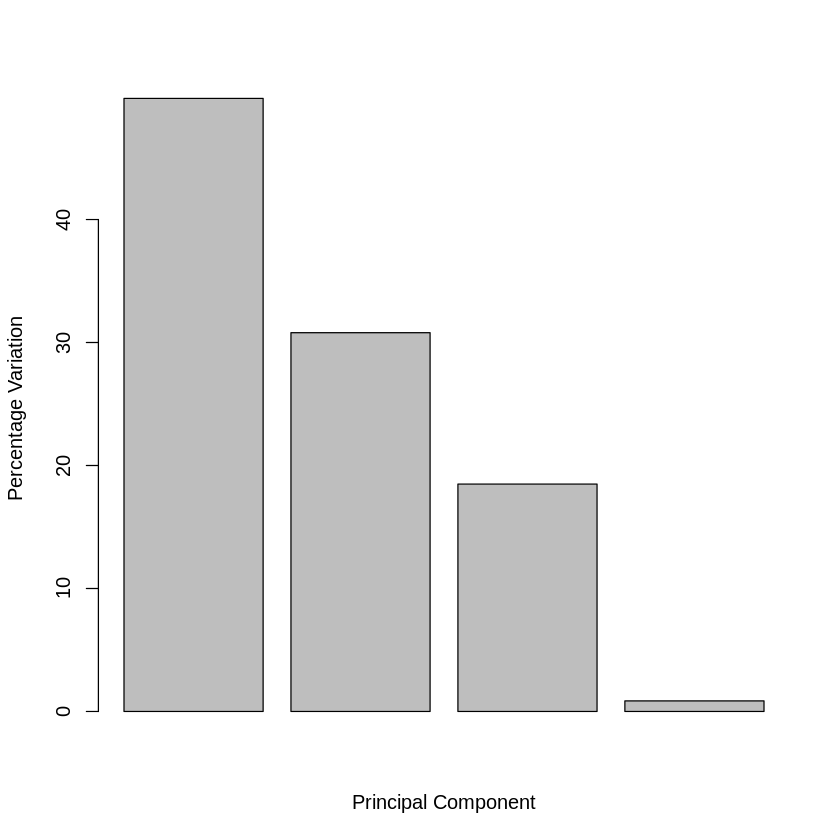

In [22]:
numcols = full_complete[, c("Age", "Travel_Distance", "DepartureDelay_in_Mins", "ArrivalDelay_in_Mins")]
pca <- prcomp(numcols, scale=T)
pca.var <- pca$sdev^2
pca.var.per <- round(pca.var/sum(pca.var) * 100, 2)
barplot(pca.var.per, xlab="Principal Component", ylab="Percentage Variation")

We are more concerned about the `Overall_Experience` of onboarding passengers. Hence, we'll neglect `ArrivalDelay_in_Mins` since the survey collects this information after the passengers off-board.

## Model Selection and Model Fitting

Now that we have successfully reduced data complexity. We can go ahead and fit a logistic regression on our population data with our chosen variables. And we continue our analysis to find the 3 best predictors.

### Fitting a Logistic Regression Model

In [23]:
full_model <- glm(Overall_Experience ~ Onboard_entertainment + Onlinebooking_Ease + Baggage_handling + CustomerType + Age + Travel_Distance + DepartureDelay_in_Mins, data = full_complete, family = binomial())
summary(full_model)


Call:
glm(formula = Overall_Experience ~ Onboard_entertainment + Onlinebooking_Ease + 
    Baggage_handling + CustomerType + Age + Travel_Distance + 
    DepartureDelay_in_Mins, family = binomial(), data = full_complete)

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                            9.757e-01  6.337e-01   1.540 0.123630
Onboard_entertainmentacceptable       -1.754e+00  5.361e-01  -3.272 0.001068
Onboard_entertainmentexcellent         2.510e+00  5.368e-01   4.676 2.93e-06
Onboard_entertainmentextremely poor    7.476e-01  5.382e-01   1.389 0.164801
Onboard_entertainmentgood              3.849e-01  5.359e-01   0.718 0.472648
Onboard_entertainmentneed improvement -1.841e+00  5.363e-01  -3.433 0.000596
Onboard_entertainmentpoor             -1.607e+00  5.366e-01  -2.995 0.002743
Onlinebooking_Easeacceptable          -1.458e+00  3.725e-01  -3.915 9.05e-05
Onlinebooking_Easeexcellent           -6.004e-01  3.724e-01  -1.612 0.

Our categorical variables have various levels. It seems difficult to understand which global predictors are essential.

### Model Selection using Lasso, AIC and Backward Selection

We'll fit a Lasso regression, and gradually increase the strength of the regularization parameter. This way, we'll attempt to visualize more significant parameters.

24 x 1 sparse Matrix of class "dgCMatrix"
                                                s1
(Intercept)                            0.088100967
Onboard_entertainment                  .          
Onboard_entertainmentacceptable       -1.674902229
Onboard_entertainmentexcellent         2.181797525
Onboard_entertainmentextremely poor    0.433887323
Onboard_entertainmentgood              0.292962353
Onboard_entertainmentneed improvement -1.747612091
Onboard_entertainmentpoor             -1.485675173
Onlinebooking_Easeacceptable           .          
Onlinebooking_Easeexcellent            0.766934408
Onlinebooking_Easeextremely poor       .          
Onlinebooking_Easegood                 0.867598163
Onlinebooking_Easeneed improvement    -0.331090251
Onlinebooking_Easepoor                -0.923401067
Baggage_handlingacceptable            -0.623110349
Baggage_handlingexcellent              0.648756855
Baggage_handlinggood                   0.039625096
Baggage_handlingneed improvement      -0

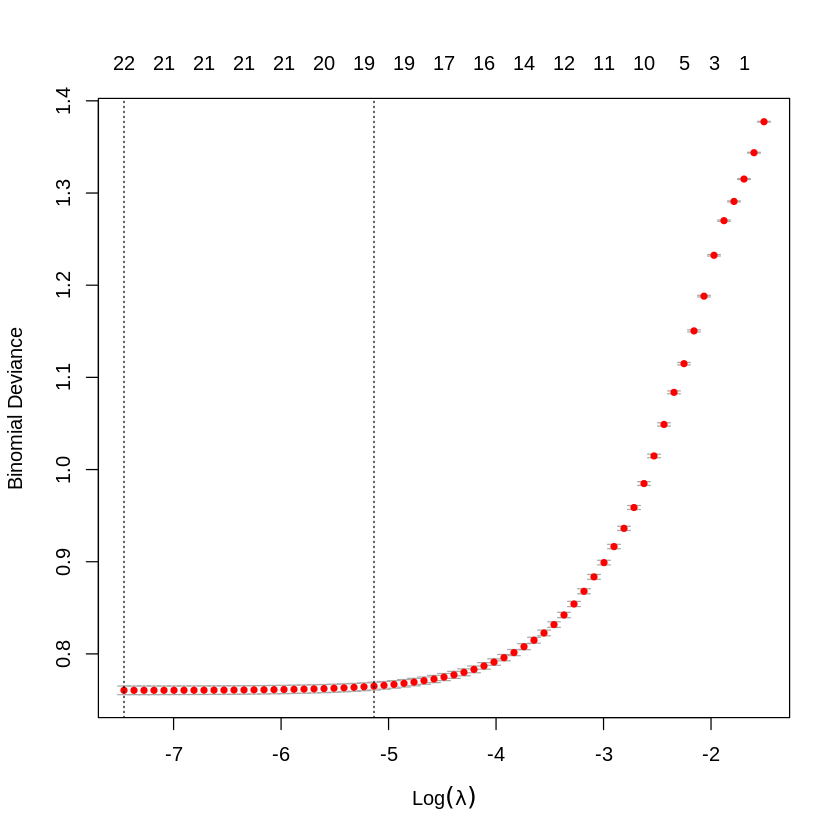

In [24]:
# Lasso Regression
x <- model.matrix(Overall_Experience ~ Onboard_entertainment + Onlinebooking_Ease + Baggage_handling + CustomerType + Age + Travel_Distance + DepartureDelay_in_Mins - 1, data=full_complete)
y <- full_complete$Overall_Experience

cv_fit <- cv.glmnet(x, y, family="binomial", alpha=1)
plot(cv_fit)
coef(cv_fit, s="lambda.1se")

We already observe `Travel_Distance` being forced to zero. We'll increase the strength parameter a bit further to observe its effects.

In [25]:
incremented_lambda <- cv_fit$lambda.1se + 0.03
coef(cv_fit, s=incremented_lambda)

24 x 1 sparse Matrix of class "dgCMatrix"
                                              s1
(Intercept)                           -0.2817019
Onboard_entertainment                  .        
Onboard_entertainmentacceptable       -0.7193269
Onboard_entertainmentexcellent         2.0032472
Onboard_entertainmentextremely poor    .        
Onboard_entertainmentgood              0.7006682
Onboard_entertainmentneed improvement -0.7581119
Onboard_entertainmentpoor             -0.4145802
Onlinebooking_Easeacceptable           .        
Onlinebooking_Easeexcellent            0.4512165
Onlinebooking_Easeextremely poor       .        
Onlinebooking_Easegood                 0.5478915
Onlinebooking_Easeneed improvement    -0.1118917
Onlinebooking_Easepoor                -0.4348406
Baggage_handlingacceptable            -0.2683590
Baggage_handlingexcellent              0.3613980
Baggage_handlinggood                   .        
Baggage_handlingneed improvement       .        
Baggage_handlingpoor       

Now we observe `Age` and `DepartureDelay_in_Mins` parameters to also have null coefficients, along with `Travel_Distance`. We can remove these from our analysis too.

We can also observe some critical information over here. For example, `Onboard_entertainmentexcellent` has the highest postitive regeression coefficient of 2.0032472. With a targeted strategic approach, Shinkansen trains maintenance team can work to ensure better onboard entertainment experience of its passengers to significantly improve their `Overall_Experience`.

**Note:** We decided to not perform stepwise selection (in any direction) due to the complex nature of our data, and the computational demands of running this algorithm. Instead of performing an exhaustive search and checking for all model combinations (even if redundant), we decided to optimize our search process. 

Below, we attempt to replicate the stepwise selection process by simulating a function with a simple for loop that fits a logistic regression for some parameters and returns the models AIC values. The catch here is that we only perform this function for a parameter size of 3 predictors since that's what we are interested in. Then, we simply find the model with the lowest AIC value, and its predictor variable combination.

In [26]:
predictors <- c("Onboard_entertainment", "Onlinebooking_Ease", "Baggage_handling", 
                "CustomerType")
combinations <- combn(predictors, 3)

aic_values <- sapply(1:ncol(combinations), function(i) {
  formula_str <- paste("Overall_Experience ~", paste(combinations[, i], collapse = " + "))
  formula <- as.formula(formula_str)
  model <- glm(formula, data = full_complete, family = "binomial")
  AIC(model)
})

In [27]:
# Find the index of the combination with the lowest AIC
best_model_index <- which.min(aic_values)

In [28]:
best_combination <- combinations[, best_model_index]
best_combination

[1] "Onboard_entertainment" "Onlinebooking_Ease"    "CustomerType"